Extraer los datos publicados en el siguiente link:
- https://www.indec.gob.ar/ftp/cuadros/economia/indicesexpgr_04.xls
- https://www.indec.gob.ar/ftp/cuadros/economia/indicesimpue_04.xls

Corregir las tablas de manera que estén limpias "tidy".
Tips:
1. Leer los xls usando pandas
2. Dropear las filas que tengan menos de 2 valores que no son Na.
3. Dropear las columnas que tengan todos valores Na.
4. Quedarse con los primeros 4 elementos de la primera columna de la dataframe (su nombre debería ser "Unnamed: 0") para eliminar el *
5. Renombrar las columnas en base a las listas guardadas como "columnas_expo" y "columnas_impo"

Este debería ser el resultado de los últimos 5 valores para las Exportaciones:
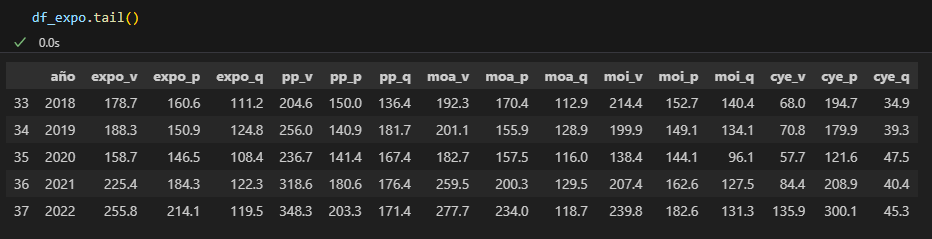

Este debería ser el resultado de los últimos 5 valores para las importaciones:
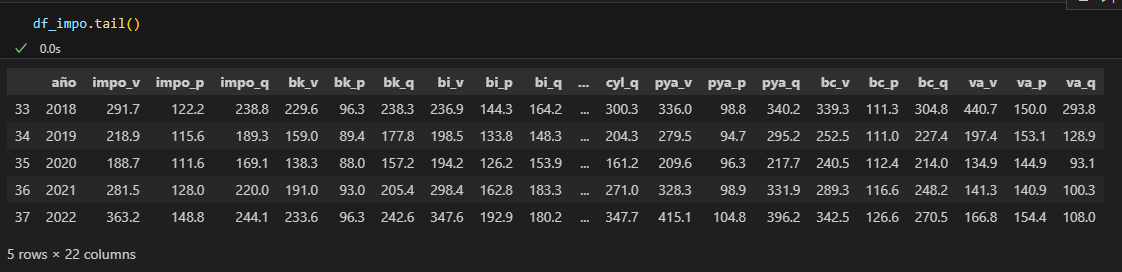

Por último:

- Guarden las columnas "año" y "expo_p" en una nueva dataframe llamada expo_df
- Guarden las columnas "año" e "impo_p" en una nueva dataframe llamada impo_df
- Hagan un merge entre expo_df e impo_df sobre la columna "año".
- Creen una nueva columna llamada "terminos_del_intercambio" que sea resultado de dividir "expo_p" por "impo_p" y multiplicar ese resultado por 100
- Describir la DataFrame creade con .describe()
- Grafiquen la serie de "terminos_del_intercambio" usando plotly.graph_objects. En el eje x debería ir "año"

Este debería ser el resultado de la descripción:

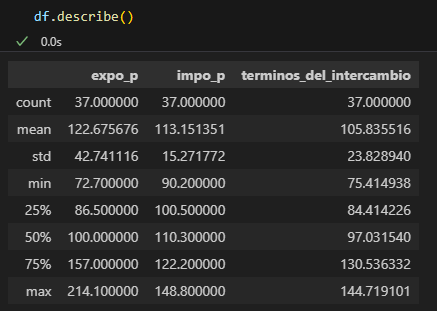

Este debería ser el resultado del gráfico:

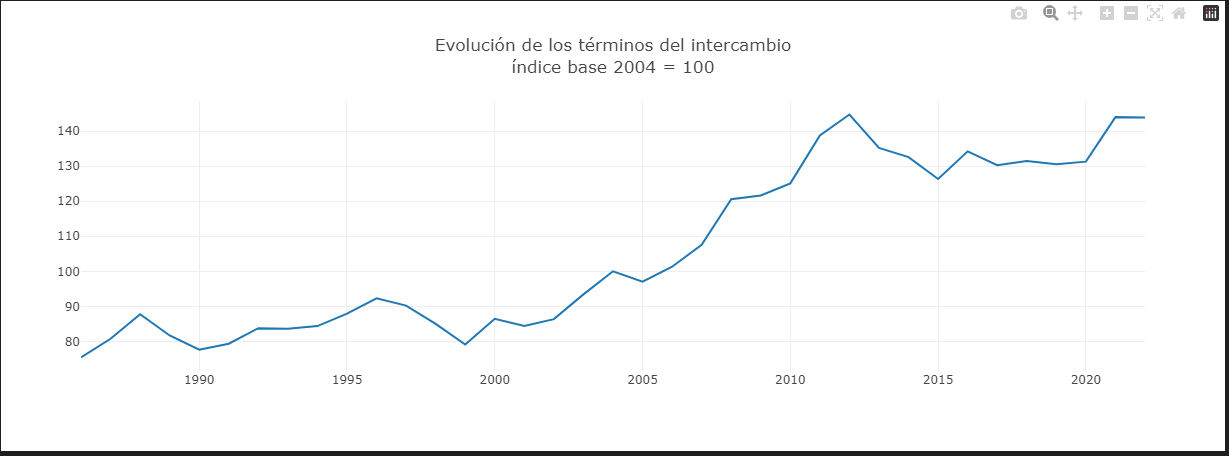

In [80]:
# Los nombres de las columnas no van a ser los correctos. Deberían usar estos una vez que eliminan las filas y columnas con espacios en blanco

columnas_expo = [
    "año",
    "expo_v","expo_p","expo_q",
    "pp_v","pp_p","pp_q",
    "moa_v","moa_p","moa_q",
    "moi_v","moi_p","moi_q",
    "cye_v","cye_p","cye_q"]

columnas_impo = [
    "año",
    "impo_v","impo_p","impo_q",
    "bk_v", "bk_p","bk_q",
    "bi_v","bi_p","bi_q",
    "cyl_v","cyl_p","cyl_q",
    "pya_v","pya_p","pya_q",
    "bc_v","bc_p","bc_q",
    "va_v","va_p","va_q"
    ]

In [81]:
import pandas as pd
import plotly.graph_objects as go

In [82]:
df_expo = pd.read_excel("https://www.indec.gob.ar/ftp/cuadros/economia/indicesexpgr_04.xls",
              header=3)
df_expo = df_expo.dropna(axis=0, thresh=2)
df_expo = df_expo.dropna(axis=1, how="all")
df_expo["Unnamed: 0"] = df_expo["Unnamed: 0"].str[:4]

In [83]:
df_impo = pd.read_excel("https://www.indec.gob.ar/ftp/cuadros/economia/indicesimpue_04.xls",
              header=3)
df_impo = df_impo.dropna(axis=0, thresh=2)
df_impo = df_impo.dropna(axis=1, how="all")
df_impo["Unnamed: 0"] = df_impo["Unnamed: 0"].str[:4]

In [84]:
df_expo.columns = columnas_expo
df_impo.columns = columnas_impo

In [85]:
df_expo.tail()

,año,expo_v,expo_p,expo_q,pp_v,pp_p,pp_q,moa_v,moa_p,moa_q,moi_v,moi_p,moi_q,cye_v,cye_p,cye_q
33,2018,178.7,160.6,111.2,204.6,150.0,136.4,192.3,170.4,112.9,214.4,152.7,140.4,68.0,194.7,34.9
34,2019,188.3,150.9,124.8,256.0,140.9,181.7,201.1,155.9,128.9,199.9,149.1,134.1,70.8,179.9,39.3
35,2020,158.7,146.5,108.4,236.7,141.4,167.4,182.7,157.5,116.0,138.4,144.1,96.1,57.7,121.6,47.5
36,2021,225.4,184.3,122.3,318.6,180.6,176.4,259.5,200.3,129.5,207.4,162.6,127.5,84.4,208.9,40.4
37,2022,255.8,214.1,119.5,348.3,203.3,171.4,277.7,234.0,118.7,239.8,182.6,131.3,135.9,300.1,45.3


In [86]:
df_impo.tail()

,año,impo_v,impo_p,impo_q,bk_v,bk_p,bk_q,bi_v,bi_p,bi_q,...,cyl_q,pya_v,pya_p,pya_q,bc_v,bc_p,bc_q,va_v,va_p,va_q
33,2018,291.7,122.2,238.8,229.6,96.3,238.3,236.9,144.3,164.2,...,300.3,336.0,98.8,340.2,339.3,111.3,304.8,440.7,150.0,293.8
34,2019,218.9,115.6,189.3,159.0,89.4,177.8,198.5,133.8,148.3,...,204.3,279.5,94.7,295.2,252.5,111.0,227.4,197.4,153.1,128.9
35,2020,188.7,111.6,169.1,138.3,88.0,157.2,194.2,126.2,153.9,...,161.2,209.6,96.3,217.7,240.5,112.4,214.0,134.9,144.9,93.1
36,2021,281.5,128.0,220.0,191.0,93.0,205.4,298.4,162.8,183.3,...,271.0,328.3,98.9,331.9,289.3,116.6,248.2,141.3,140.9,100.3
37,2022,363.2,148.8,244.1,233.6,96.3,242.6,347.6,192.9,180.2,...,347.7,415.1,104.8,396.2,342.5,126.6,270.5,166.8,154.4,108.0


In [87]:
df_expo = df_expo[["año","expo_p"]]
df_impo = df_impo[["año","impo_p"]]
df = df_expo.merge(df_impo, on="año", how="left")
df["terminos_del_intercambio"] = df["expo_p"] / df["impo_p"] * 100

In [88]:
df.describe()

,expo_p,impo_p,terminos_del_intercambio
count,37.000000,37.000000,37.000000
mean,122.675676,113.151351,105.835516
std,42.741116,15.271772,23.828940
min,72.700000,90.200000,75.414938
25%,86.500000,100.500000,84.414226
50%,100.000000,110.300000,97.031540
75%,157.000000,122.200000,130.536332
max,214.100000,148.800000,144.719101


In [90]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df["año"], y = df["terminos_del_intercambio"], name = "Términos del intercambio"))
fig.update_layout(template = None, title_text = "Evolución de los términos del intercambio<br>índice base 2004 = 100")